In [1]:
import config
import torch
import sys
sys.path.append('../util')
sys.path.append('../others_networks')
import time
from Trainer import Trainer
from util import measure_inference_speed, count_trainable_parameters
from DatasetReader import *

from UNext import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
result_path = './UNext/'

/home/alan/miniconda3/envs/pytorch5070/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/alan/miniconda3/envs/pytorch5070/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [ ]:
# from util import compile_xls_best_results
# compile_xls_best_results(result_path, output_file="unext.xlsx")

Arquivo salvo em: unext.xlsx


In [2]:
num_classes = config.num_classes
in_channels = config.in_channels

train_loader, test_loader, val_loader = get_datasets(dataset_dir=config.dataset_path, 
                                              resolution=config.dataset_resolution, 
                                              batch_size=config.batch_size)

torch.Size([16, 3, 256, 256]) torch.Size([16, 1, 256, 256])


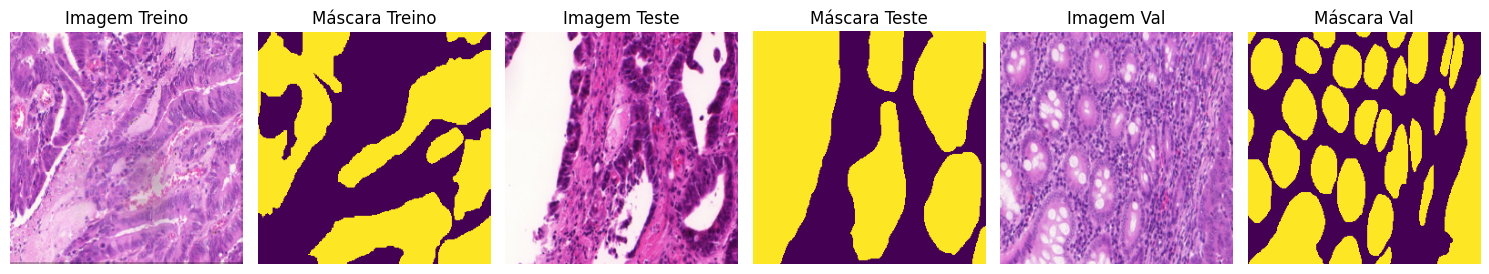

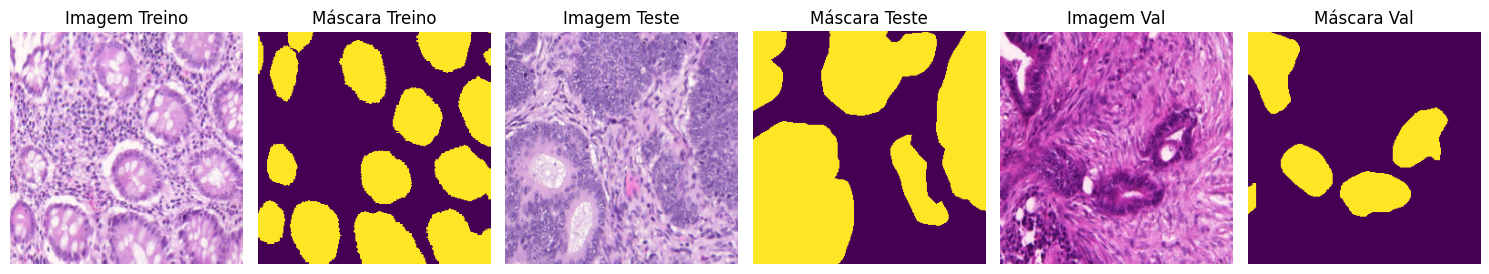

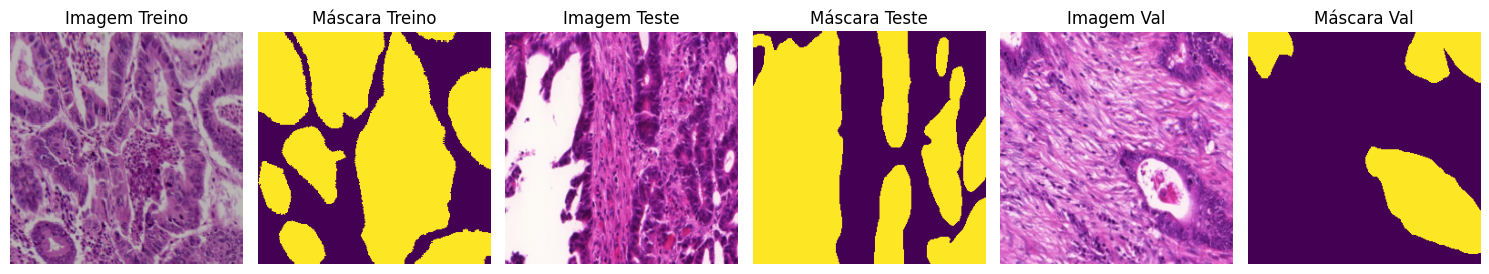

In [3]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

show_dataset_prev(train_loader, test_loader, val_loader, num_images=3)

In [4]:
def train(model, model_name):
    epochs = 300
    model_filename = f'{model_name}-epochs{epochs}.pth'
    trainer = Trainer(model_filename=model_filename,
                    model_dir=result_path, 
                    info={'weights':'DEFAULT'},
                    save_xlsx=True)
    model = trainer.train(model, train_loader, val_loader, test_loader,
                            num_epochs=epochs, 
                            save_every=1, 
                            continue_from_last=True,
                            learning_rate=1e-3,
                            verbose=1)
    model.to(device)


In [ ]:
model = UNext(input_channels=in_channels, num_classes=num_classes, img_size=config.dataset_resolution)
train(model,'UNext-1')

Loss function: BCEDiceLoss
trainable_parameters: 1471921
Parando na época 36 por early stopping. 0.2104 Dice: 0.9147 mIoU: 0.8450 F1: 0.9147 IoU: 0.8387 Prec: 0.9142 Recall: 0.9153 Q: 0.7752 Time: 00:02:15 LR:0.000500

Melhor modelo:
 Epoch [16/300] - Loss: 0.0935 Val Loss: 0.1742 Dice: 0.9219 mIoU: 0.8569 F1: 0.9219 IoU: 0.8528 Prec: 0.9229 Recall: 0.9220 Q: 0.7918 Time: 00:01:04 LR:0.001000
Ultimo modelo:
 Epoch [36/300] - Loss: 0.0626 Val Loss: 0.2104 Dice: 0.9147 mIoU: 0.8450 F1: 0.9147 IoU: 0.8387 Prec: 0.9142 Recall: 0.9153 Q: 0.7752 Time: 00:02:15 LR:0.000500
 GPU_FPS: 2956.728378199762  CPU_FPS: 24.597273398685264
Saved as ./UNext//UNext-1-epochs300.pth


In [6]:
model = UNext(input_channels=in_channels, num_classes=num_classes, img_size=config.dataset_resolution)
train(model,'UNext-2')

Loss function: BCEDiceLoss
trainable_parameters: 1471921
Parando na época 52 por early stopping. 0.2011 Dice: 0.9221 mIoU: 0.8571 F1: 0.9221 IoU: 0.8514 Prec: 0.9225 Recall: 0.9218 Q: 0.7920 Time: 00:03:19 LR:0.000500

Melhor modelo:
 Epoch [32/300] - Loss: 0.0721 Val Loss: 0.1643 Dice: 0.9277 mIoU: 0.8663 F1: 0.9277 IoU: 0.8596 Prec: 0.9274 Recall: 0.9284 Q: 0.8048 Time: 00:02:06 LR:0.001000
Ultimo modelo:
 Epoch [52/300] - Loss: 0.0534 Val Loss: 0.2011 Dice: 0.9221 mIoU: 0.8571 F1: 0.9221 IoU: 0.8514 Prec: 0.9225 Recall: 0.9218 Q: 0.7920 Time: 00:03:19 LR:0.000500
 GPU_FPS: 2975.738914508691  CPU_FPS: 24.087925467229674
Saved as ./UNext//UNext-2-epochs300.pth


In [7]:
model = UNext(input_channels=in_channels, num_classes=num_classes, img_size=config.dataset_resolution)
train(model,'UNext-3')

Loss function: BCEDiceLoss
trainable_parameters: 1471921
Parando na época 50 por early stopping. 0.1818 Dice: 0.9253 mIoU: 0.8624 F1: 0.9253 IoU: 0.8552 Prec: 0.9253 Recall: 0.9257 Q: 0.7995 Time: 00:03:01 LR:0.000500

Melhor modelo:
 Epoch [30/300] - Loss: 0.0719 Val Loss: 0.1472 Dice: 0.9322 mIoU: 0.8747 F1: 0.9322 IoU: 0.8697 Prec: 0.9327 Recall: 0.9318 Q: 0.8170 Time: 00:01:49 LR:0.001000
Ultimo modelo:
 Epoch [50/300] - Loss: 0.0539 Val Loss: 0.1818 Dice: 0.9253 mIoU: 0.8624 F1: 0.9253 IoU: 0.8552 Prec: 0.9253 Recall: 0.9257 Q: 0.7995 Time: 00:03:01 LR:0.000500
 GPU_FPS: 2957.640546496254  CPU_FPS: 23.901721693913167
Saved as ./UNext//UNext-3-epochs300.pth
